### An analysis of Arizona investment property ($445,000), February 2024 
by Matthew Wang 

## Our Model 

We are using the Net Present Value (NPV) model for evaluating whether the investment is worthwhile or not. NVP looks at the investment's cash flows and discounts them. The NPV is great for evaluating an investment property as it takes into consideration time value of money, future cash flows, and opportunity cost of other investments (discount rate). The limitations of this model, like all models, is that it makes assumptions of the numbers, such as risk free rate and home appreciation. It does not also model other external risks associated with owning an investment property. This model just looks at the cash flows. 

**If NVP is positive, the investment is worth taking. Otherwise, the investment is not worthwhile**

[Read about NPV here](https://www.investopedia.com/terms/n/npv.asp#:~:text=Net%20present%20value%20(NPV)%20is,a%20projected%20investment%20or%20project.)


## Scenario 1: Expected scenario with baseline assumptions
The model assumes some values. We can change our assumptions to model different economic situations. I'm assuming this is a 10 year investment before we sell. I'm using the current AZ 30 year mortgage interest rates (6.9%) to calculate our total estimated monthly payment. I also added an additional $300 / month to the monthly payment for maintenance costs. I did a conservative assumption of annual appreciation, 3%, based off [this article](https://www.movoto.com/guide/az/9-places-in-arizona-with-the-best-home-appreciation-rates/). I assume rental income grows 2% per year. We assume 6% realtor / sales fees of the sale price. 

**The benchmark (discount rate) is set to 5%, which is the current risk free rate.** That is, the returns you'd get if you put the money in a HYSA.



| index                   |  value |
| :----------------      | ------: |
| Home price              |   \$445000 |  
| Percentage down payment |   20\% |
| Mortgage Interest Rate       |  6.9\% |
| Mortgage Length           |  30 years  |
| Additional Monthly Cost (HOA, Taxes, Insurance) | \$330 |
| Monthly Rental Income   |  \$2300 |
| Anual Home Appreciation        |  3\% |
| Anual Rental Income Appreciation |  2\% |
| Investment Duration              |  10 years |
| Discount rate (min required return)    | 5\% |
| Sales Fee          |  6\% |







In [1]:
import npv as net_present_value
parameters = {
    'home_price': 445000, 
    'percent_down': 0.2, 
    'mortgage_interest': 0.069, 
    'mortgage_length': 30, 
    'other_monthly_cost': 430,
    'monthly_rental_income': 2300, 
    'annual_rental_income_appreciation': 0.02, 
    'annual_home_appreciation': .03, 
    'investment_duration': 10, 
    'discount_rate': .05,
    'selling_fee': .06
}
npv = net_present_value.NPV(**parameters)
mortgage = npv.MORTGAGE

## Mortgage Structure

In [2]:
npv.summarize_mortgage()

                     Rate:      0.069000
             Month Growth:      1.005750
                      APY:      0.071224
             Payoff Years:            30
            Payoff Months:           360
                   Amount:     356000.00
          Monthly Payment:       2344.62
           Annual Payment:      28135.44
             Total Payout:     844063.20


## Cash Flows

In [3]:
npv.annual_cash_flows_df()

,year,cash_flow,discounted_cash_flow
0,0,-89000.000000,-89000.000000
1,1,-5143.440000,-4898.510000
2,2,-4580.400000,-4154.560000
3,3,-4006.100000,-3460.620000
4,4,-3420.310000,-2813.900000
5,5,-2822.810000,-2211.750000
6,6,-2213.360000,-1651.640000
7,7,-1591.720000,-1131.200000
8,8,-957.640000,-648.170000
9,9,-310.890000,-200.400000


## Net Present Value

In [4]:
npv.summarize_df()

This property beats the benchmark and is worth investing in


,index,value
0,Discount Rate (Benchmark),5.0%
1,Internal Rate of Return (IRR),9.2%
2,Net Present Value (NPV),$47845.1


## Interest Rates vs Internal Rate of Return

<AxesSubplot:title={'center':'Interest Rate vs Net Present Value'}, xlabel='interest_rate'>

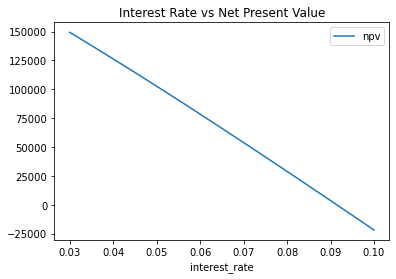

In [5]:
import pandas as pd
import numpy as np

factor = []
y = []

for fac in np.linspace(.03, .1, 50): 
    parameters = {
        'home_price': 445000, 
        'percent_down': 0.2, 
        'mortgage_interest': fac, 
        'mortgage_length': 30, 
        'other_monthly_cost': 330,
        'monthly_rental_income': 2300, 
        'annual_rental_income_appreciation': 0.02, 
        'annual_home_appreciation': .03, 
        'investment_duration': 10, 
        'discount_rate': .05,
        'selling_fee': .06
    }
    npv = net_present_value.NPV(**parameters)
    y.append(npv.NPV())
    factor.append(fac)
    
data = {'interest_rate': factor, 'npv': y}
df = pd.DataFrame(data=data)
df.plot(x='interest_rate', y='npv', title='Interest Rate vs Net Present Value')

<AxesSubplot:title={'center':'Annual Home Appreciation vs Net Present Value'}, xlabel='annual_home_appreciation'>

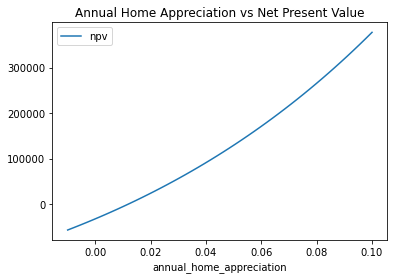

In [6]:
factor = []
y = []

for fac in np.linspace(-.01, .1, 50): 
    parameters = {
        'home_price': 445000, 
        'percent_down': 0.2, 
        'mortgage_interest': 0.069, 
        'mortgage_length': 30, 
        'other_monthly_cost': 330,
        'monthly_rental_income': 2300, 
        'annual_rental_income_appreciation': 0.02, 
        'annual_home_appreciation': fac, 
        'investment_duration': 10, 
        'discount_rate': .05,
        'selling_fee': .06
    }
    npv = net_present_value.NPV(**parameters)
    y.append(npv.NPV())
    factor.append(fac)
    
data = {'annual_home_appreciation': factor, 'npv': y}
df = pd.DataFrame(data=data)
df.plot(x='annual_home_appreciation', y='npv', title='Annual Home Appreciation vs Net Present Value')

# Summary 

With our assumptions and using the benchmark of 5% as the discount rate, this investment property seems worthwhile. We have a positive NPV ($56374.49) and a rate of return of 9.2%. 

We've estimated the total monthly payment, with mortgage included, to be 2730 per month. With rent at \$2300 per month growing at 2\% YoY, we won't getting positive cash flow until after 9 years. 

Looking at these two graphs, interest rates have to be below 9\% and the annual appreciation must be above 1\% for this investment to be worth it.  